# P1 AA Configuración y Entrenamiento de una Red de Neuronas



Utilizaremos la **biblioteca Python Keras** para **clasificar** artículos de ropa.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de prendas de ropa (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento, más de 10K imágenes de prueba todas ellas recopiladas por el National Institute of Standards an Technology (NIST de MNIST) en los años ochenta.
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras
- Tenemos las siguientes categorías o **clases** del problema de clasificación de ropa: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**

In [1]:
# 1._ IMPORTAMOS KERAS
import tensorflow as tf
tf.__version__ >= '2.0.0'

True

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
import numpy as np
# Vemos la matriz de la imagen número 30.000 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

In [5]:
print(train_labels[30000])

3


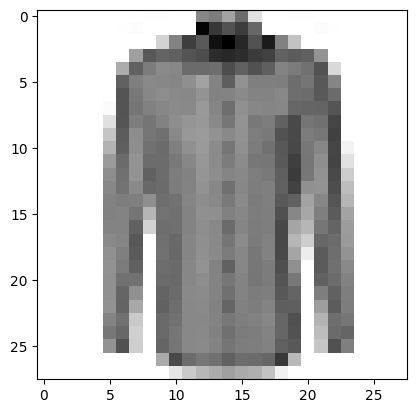

In [ ]:
import matplotlib.pyplot as plt
ropa = train_images[3000]
plt.imshow(ropa, cmap=plt.cm.binary)
plt.show()

In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


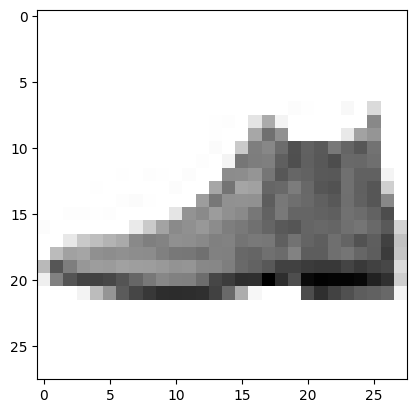

In [ ]:
# Veamos el elemento 0 de test (que vemos que es un zapato) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
ropa = test_images[0]
plt.imshow(ropa, cmap=plt.cm.binary)
plt.show()